In [3]:
"""  Apr 26, 2016

     Load AGCM runs and search for time periods of significant cooling
     
"""

import cccmaplots as cplt
import cccmaNC as cnc
import cccmautils as cutl
import constants as con
import cccmacmaps as ccm
import platform as platform
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm
import numpy.ma as ma
import pandas as pd
import loadmodeldata as lmd


%matplotlib inline


local=True


In [10]:
def runmean(input, window=5,axis=0) :
    ret = np.cumsum(input, dtype=float,axis=axis)
    ret[window:,...] = ret[window:,...] - ret[:-window,...]
    return ret[window - 1:,...] / np.float(window)


In [35]:
# load the data
sea='DJF'

field='tas'
sims=('R1','R2','R3','R4','R5')
region='eurasiamori'
styearsR = [ 8.,  7.,  2.,  8.,  8.]

simconv1=1
if field=='tas': simfield1='st'; simncfield1='ST'
elif field=='zg50000.00': simfield1='gz50000'; simncfield1='PHI'; simconv1=1/con.get_g()
elif field=='sia': simfield1='sicn'; simncfield1='SICN'; print '@@ danger, sia actually sicn average'
elif field=='sic': simfield1='sicn'; simncfield1='SICN';
else: print 'cannot addsims for ' + field;

simflddf = pd.DataFrame(lmd.loaddata((simfield1,),sims,ncfields=(simncfield1,), 
                                     timefreq=sea, region=region))*simconv1


simyrs = np.array(simflddf).flatten()

print 'yearly: less than zero: ' + str(simyrs[simyrs<0].shape)
print 'yearly: greater than zero: ' + str(simyrs[simyrs>0].shape)

#print 'less than zero: ' + str(simanoms[simanoms<0].shape)
#print 'greater than zero: ' + str(simanoms[simanoms>0].shape)


# also do 'ND'
sea2 = 'ND'
simfldnddf = pd.DataFrame(lmd.loaddata((simfield1,),sims,ncfields=(simncfield1,), 
                                     timefreq=sea2, region=region))*simconv1



@@ probably should invert the order such that it is field, season, sim?
DJF
st ST
R1
/HOME/rkm/work/DATA/CanAM4/kemctl1r1/ts/kemctl1r1_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
R2
/HOME/rkm/work/DATA/CanAM4/kemctl1r2/ts/kemctl1r2_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
R3
/HOME/rkm/work/DATA/CanAM4/kemctl1r3/ts/kemctl1r3_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
R4
/HOME/rkm/work/DATA/CanAM4/kemctl1r4/ts/kemctl1r4_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
R5
/HOME/rkm/work/DATA/CanAM4/kemctl1r5/ts/kemctl1r5_st_001-121_ts.nc
lat: squeezing data upon read all
lo

(595,)
(119, 5)


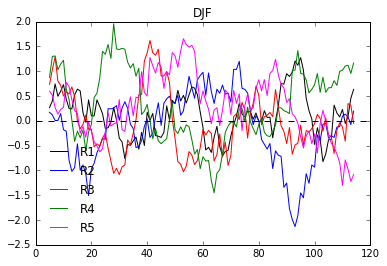

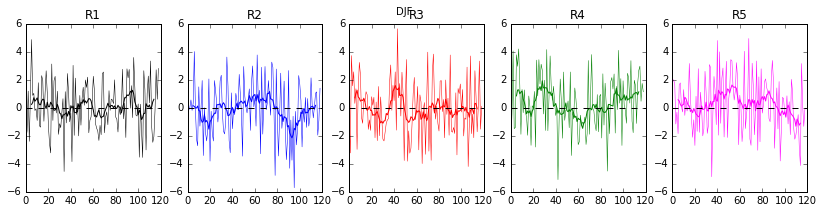

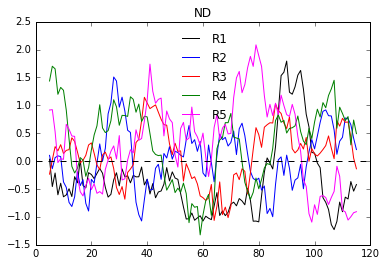

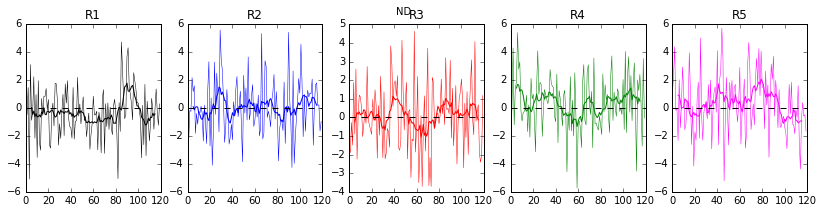

In [37]:
print simyrs.shape
print simflddf.values.shape


xx=np.arange(0,simflddf.shape[0]) # numyears
window=10
xxrun = xx[window/2:-window/2+1]

clrs=('k','b','r','g','magenta')
lgstr = simflddf.keys()


plt.figure()
for ii in range(0,simflddf.shape[1]):
    
    #plt.plot(xx,simflddf.values[:,ii],color=clrs[ii])
    plt.plot(xxrun, runmean(simflddf.values[:,ii], window=window),color=clrs[ii])

plt.axhline(y=0,linestyle='--',color='k')
plt.legend(lgstr,frameon=False,loc='best')
plt.title(sea)

fig,axs = plt.subplots(1,5,figsize=(14,3))
for ii in range(0,simflddf.shape[1]):
    ax=axs[ii]
    ax.plot(xx,simflddf.values[:,ii],color=clrs[ii],linewidth=.5)
    ax.plot(xxrun, runmean(simflddf.values[:,ii], window=window),color=clrs[ii])

    ax.set_title(simflddf.keys()[ii])
    ax.axhline(y=0,linestyle='--',color='k')
fig.suptitle(sea)




xx=np.arange(0,simfldnddf.shape[0]) # numyears
window=10
xxrun = xx[window/2:-window/2+1]

plt.figure()
for ii in range(0,simfldnddf.shape[1]):
    
    #plt.plot(xx,simflddf.values[:,ii],color=clrs[ii])
    plt.plot(xxrun, runmean(simfldnddf.values[:,ii], window=window),color=clrs[ii])

plt.axhline(y=0,linestyle='--',color='k')
plt.legend(lgstr,frameon=False,loc='best')
plt.title(sea2)

fig,axs = plt.subplots(1,5,figsize=(14,3))
for ii in range(0,simfldnddf.shape[1]):
    ax=axs[ii]
    ax.plot(xx,simfldnddf.values[:,ii],color=clrs[ii],linewidth=.5)
    ax.plot(xxrun, runmean(simfldnddf.values[:,ii], window=window),color=clrs[ii])

    ax.set_title(simfldnddf.keys()[ii])
    ax.axhline(y=0,linestyle='--',color='k')
fig.suptitle(sea2)


In [38]:
r2 = simflddf['R2']
print r2.shape


# get r2 ctl and pert separately
r2ctl = pd.DataFrame(lmd.loaddata((simfield1,),('R2',),ncfields=(simncfield1,), 
                                     timefreq=sea, region=region,filetype='ctl'))*simconv1
r2pt = pd.DataFrame(lmd.loaddata((simfield1,),('R2',),ncfields=(simncfield1,), 
                                     timefreq=sea, region=region,filetype='pert'))*simconv1


r1nd=simfldnddf['R1']
# get r2 ctl and pert separately
r1ndctl = pd.DataFrame(lmd.loaddata((simfield1,),('R1',),ncfields=(simncfield1,), 
                                     timefreq=sea2, region=region,filetype='ctl'))*simconv1
r1ndpt = pd.DataFrame(lmd.loaddata((simfield1,),('R1',),ncfields=(simncfield1,), 
                                     timefreq=sea2, region=region,filetype='pert'))*simconv1


(119,)
@@ probably should invert the order such that it is field, season, sim?
DJF
st ST
R2
/HOME/rkm/work/DATA/CanAM4/kemctl1r2/ts/kemctl1r2_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
@@ probably should invert the order such that it is field, season, sim?
DJF
st ST
R2
/HOME/rkm/work/DATA/CanAM4/kemctl1r2/ts/kemctl1r2_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (119, 64, 128)
@@ probably should invert the order such that it is field, season, sim?
ND
st ST
R1
/HOME/rkm/work/DATA/CanAM4/kemctl1r1/ts/kemctl1r1_st_001-121_ts.nc
lat: squeezing data upon read all
lon: squeezing data upon read all
calc_regmean() removing extra lon. fld new shape: (120, 64, 128)
@@ probably should invert the order such that it is field, season, sim?
ND
st ST
R1
/HOME/rkm/work/DATA/CanAM4/kemctl1r1/ts/kemctl1r1_st_00

In [41]:
styear = 80
tstat,pval = cutl.ttest_ind(r2ctl[styear:],r2pt[styear:])

print sea
print 'last 40 years of R2'
print 'diff ' + str(r2[styear:].mean())
print 'tstat,pval ' + str(tstat),str(pval)


styear = 60
tstat,pval = cutl.ttest_ind(r2ctl[styear:],r2pt[styear:])

print '\nlast 60 years of R2'
print 'diff ' + str(r2[styear:].mean())
print 'tstat,pval ' + str(tstat),str(pval)

print '\ncompare to full time period'

tstat,pval = cutl.ttest_ind(r2ctl,r2pt)
print 'diff ' + str(r2.mean())
print 'tstat,pval ' + str(tstat),str(pval)


# ========================== ND

styear=0; enyear=80

tstat,pval = cutl.ttest_ind(r2ctl[styear:enyear],r2pt[styear:enyear])

print '\n' + sea2
print 'first 80 years of R1'
print 'diff ' + str(r1nd[styear:enyear].mean())
print 'tstat,pval ' + str(tstat),str(pval)



styear = 0; enyear=60
tstat,pval = cutl.ttest_ind(r1ndctl[styear:enyear],r1ndpt[styear:enyear])

print '\nfirst 60 years of R1'
print 'diff ' + str(r1nd[styear:enyear].mean())
print 'tstat,pval ' + str(tstat),str(pval)

print '\ncompare to full time period'

tstat,pval = cutl.ttest_ind(r1ndctl,r1ndpt)
print 'diff ' + str(r1nd.mean())
print 'tstat,pval ' + str(tstat),str(pval)



DJF
last 40 years of R2
diff -0.641619452795
tstat,pval [ 1.97193599] [ 0.05225586]

last 60 years of R2
diff -0.208320270283
tstat,pval [ 0.77614454] [ 0.43924327]

compare to full time period
diff -0.104848020492
tstat,pval [ 0.57288505] [ 0.56726794]

ND
first 80 years of R1
diff -0.499546478231
tstat,pval [-0.71578032] [ 0.4751835]

first 60 years of R1
diff -0.44138035045
tstat,pval [ 1.91099101] [ 0.05843171]

compare to full time period
diff -0.316631248223
tstat,pval [ 1.78289145] [ 0.07587847]
